# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {Team 3}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.correlation import plot_corr

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import math
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import datetime as dt
# Setting global constants to ensure no
# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
# Importing the Datasets

train_df = pd.read_csv('df_train.csv') # load the train data
test_df = pd.read_csv('df_test.csv') # load the train data

In [3]:
# Overviewing the train data set

train_df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [4]:
# Displaying the dataset dimensions

train_df.shape

(8763, 49)

In [5]:
# Displaying all the feature names

print(train_df.columns)

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

- It can be observed from the shape of the dataset that there are 49 columns/features and 8763 rows/observations.
- Since there are some hidden features, a list of all the features of the dataset can be viewed above.

In [6]:
# Displaying information of the Train Dataframe

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

- There are 46 numeric data types present, of which there are 45 floats and 1 integer data type
- There are 3 non-numeric data types which are indicated by the term 'object'.
- Features such as time, Valencia_wind_deg and Seville_pressure with have non-numeric data types

In [7]:
# Displaying the total number of Null Values per feature

train_df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

- The majority of the features have no missing values except for the Valencia_pressure feature that has a total of 2068 missing values.
- These missing values will be later dealt with by replacing these values with the mean or median in the data engineering section of the notebook

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [8]:
# Look at data statistics

train_df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


- Mean values of some features such as Valencia_snow_3h, Barcelona_pressure, Bilbao_snow_3h, etc. are large and they are far apart from the range, minimum and maximum values.
- The maximum values infer that there might be some outliers in the data.

C:\Users\samue\AppData\Local\Temp/ipykernel_9108/2153813197.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df.kurtosis(skipna=True).plot()


<AxesSubplot:>

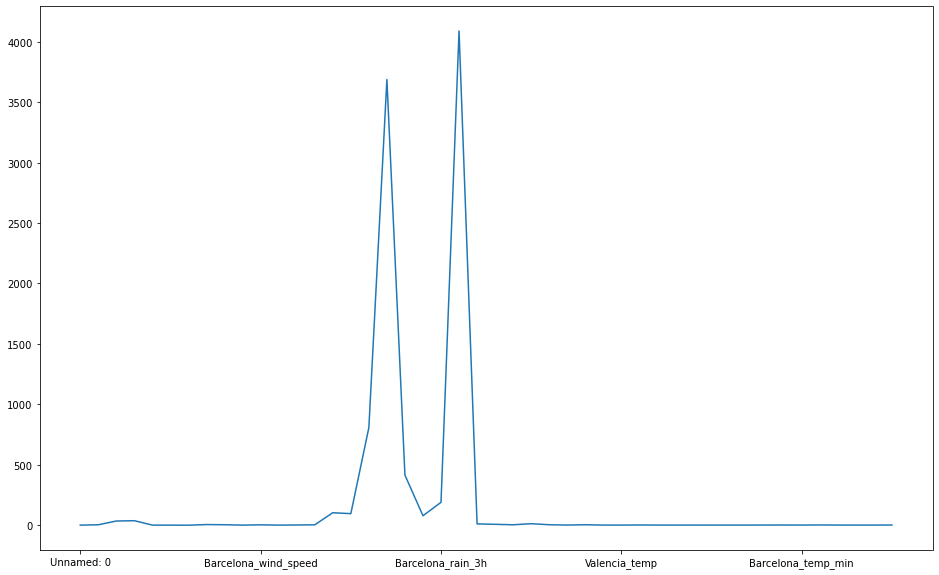

In [9]:
# Plot relevant feature interactions

# Checking for outliers in each feature

plt.figure(figsize = [16,10])
train_df.kurtosis(skipna=True).plot()

In [10]:
train_df.kurtosis()

C:\Users\samue\AppData\Local\Temp/ipykernel_9108/861045134.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df.kurtosis()


Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

Features with large number of outliers are as follows:
- Bilbao_rain_1h
- Valencia_wind_speed
- Bilbao_wind_speed
- Barcelona_rain_1h
- Seville_rain_1h 
- Bilbao_snow_3h
- Barcelona_pressure
- Seville_rain_3h
- Madrid_rain_1h
- Barcelona_rain_3h
- Valencia_snow_3h
- Madrid_weather_id
- Barcelona_weather_id
- Seville_weather_id

Features with the most outliers were Barcelona_rain_1h, Seville_rain_1h, Bilbao_snow_3h, Barcelona_pressure, Seville_rain_3h, Madrid_rain_1h, Barcelona_rain_3h and Valencia_snow_3h.

These features with the most outliers will be visualized next.

<AxesSubplot:xlabel='Barcelona_rain_1h'>

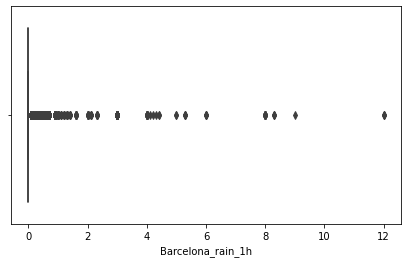

In [11]:
# Have a look at feature distributions

# Boxplot displaying outliers in Barcelona rainfall in 1 hour Time Frame

plt.figure(figsize = [7,4])
sns.boxplot(x='Barcelona_rain_1h', data=train_df)

<AxesSubplot:xlabel='Seville_rain_1h'>

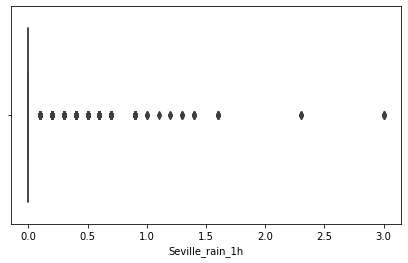

In [12]:
# Boxplot displaying outliers in Seville rainfall in 1 hour Time Frame

plt.figure(figsize = [7,4])
sns.boxplot(x='Seville_rain_1h', data=train_df)

<AxesSubplot:xlabel='Bilbao_snow_3h'>

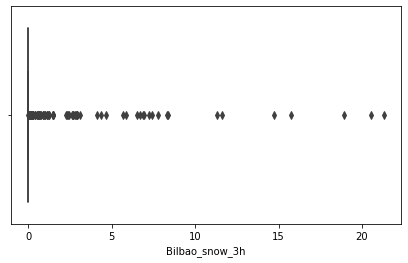

In [13]:
# Boxplot displaying outliers in Bilbao Snowfall in 3 hours Time Frame

plt.figure(figsize = [7,4])
sns.boxplot(x='Bilbao_snow_3h', data=train_df)

<AxesSubplot:xlabel='Barcelona_pressure'>

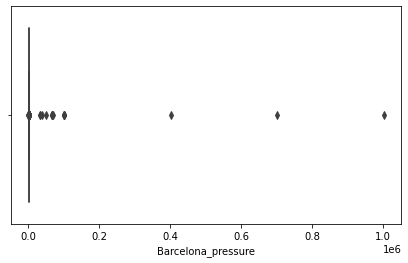

In [14]:
# Boxplot displaying outliers in the Barcelona Pressure

plt.figure(figsize = [7,4])
sns.boxplot(x='Barcelona_pressure', data=train_df)

<AxesSubplot:xlabel='Seville_rain_3h'>

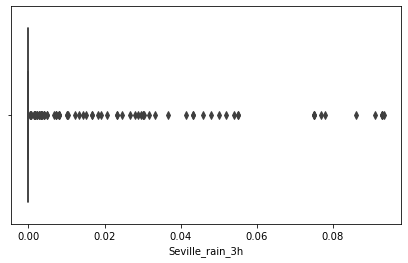

In [15]:
# Boxplot displaying outliers in Seville rainfall in 3 hours Time Frame

plt.figure(figsize = [7,4])
sns.boxplot(x='Seville_rain_3h', data=train_df)

<AxesSubplot:xlabel='Madrid_rain_1h'>

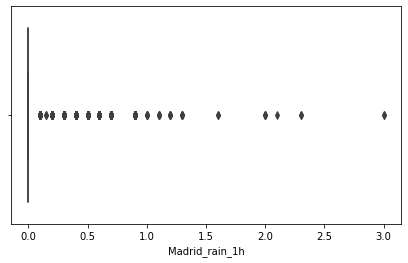

In [16]:
# Boxplot displaying outliers in Madrid rainfall in 1 hour Time Frame

plt.figure(figsize = [7,4])
sns.boxplot(x='Madrid_rain_1h', data=train_df)

<AxesSubplot:xlabel='Barcelona_rain_3h'>

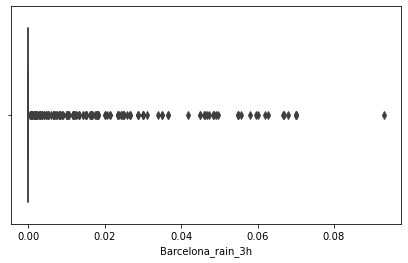

In [17]:
# Boxplot displaying outliers in Barcelona rainfall in 3 hours Time Frame

plt.figure(figsize = [7,4])
sns.boxplot(x='Barcelona_rain_3h', data=train_df)

<AxesSubplot:xlabel='Valencia_snow_3h'>

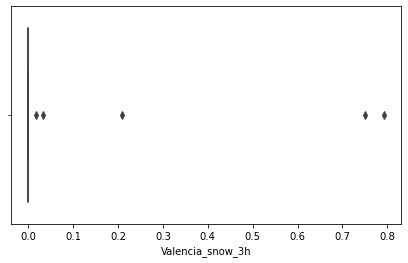

In [18]:
# Boxplot displaying outliers in Valencia Snowfall in 3 hours Time Frame

plt.figure(figsize = [7,4])
sns.boxplot(x='Valencia_snow_3h', data=train_df)

C:\Users\samue\AppData\Local\Temp/ipykernel_9108/112637057.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df.skew(skipna=True).plot()


<AxesSubplot:>

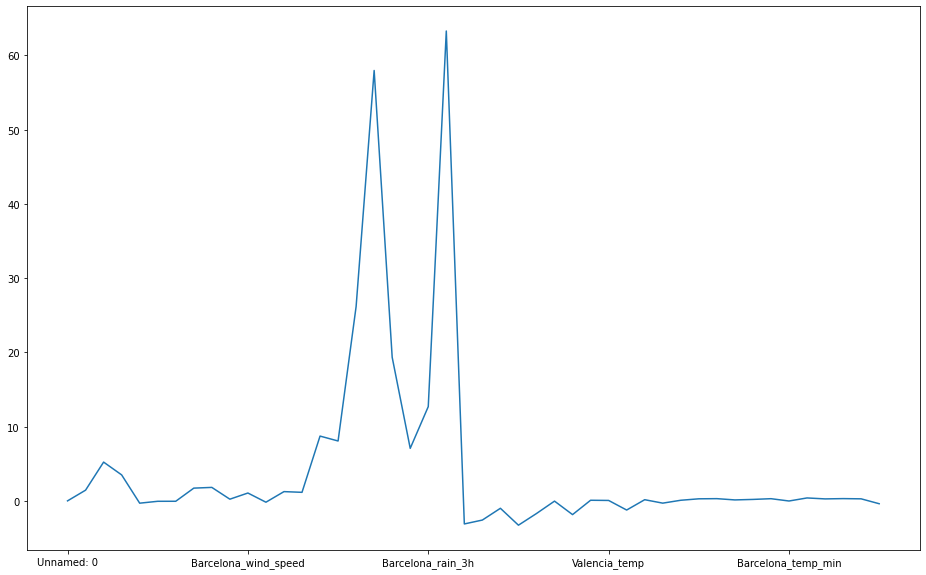

In [19]:
# Checking the direction of the outliers

plt.figure(figsize = [16,10])
train_df.skew(skipna=True).plot()

In [20]:
train_df.skew()

C:\Users\samue\AppData\Local\Temp/ipykernel_9108/2566899487.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df.skew()


Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

Features with large positive skewness:
- Bilbao_rain_1h
- Valencia_wind_speed
- Madrid_wind_speed
- Bilbao_wind_speed
- Seville_clouds_all
- Barcelona_wind_speed
- Madrid_clouds_all
- Seville_wind_speed
- Barcelona_rain_1h
- Seville_rain_1h
- Bilbao_snow_3h
- Barcelona_pressure
- Seville_rain_3h
- Madrid_rain_1h
- Barcelona_rain_3h
- Valencia_snow_3h

Features with large negative skewness:
- Madrid_weather_id
- Barcelona_weather_id
- Bilbao_pressure
- Seville_weather_id
- Valencia_pressure
- Seville_temp_max
- Madrid_pressure
- Bilbao_weather_id

It must be made aware that most of these features contain many outliers

Text(0.5, 1.0, 'Correlation Heatmap')

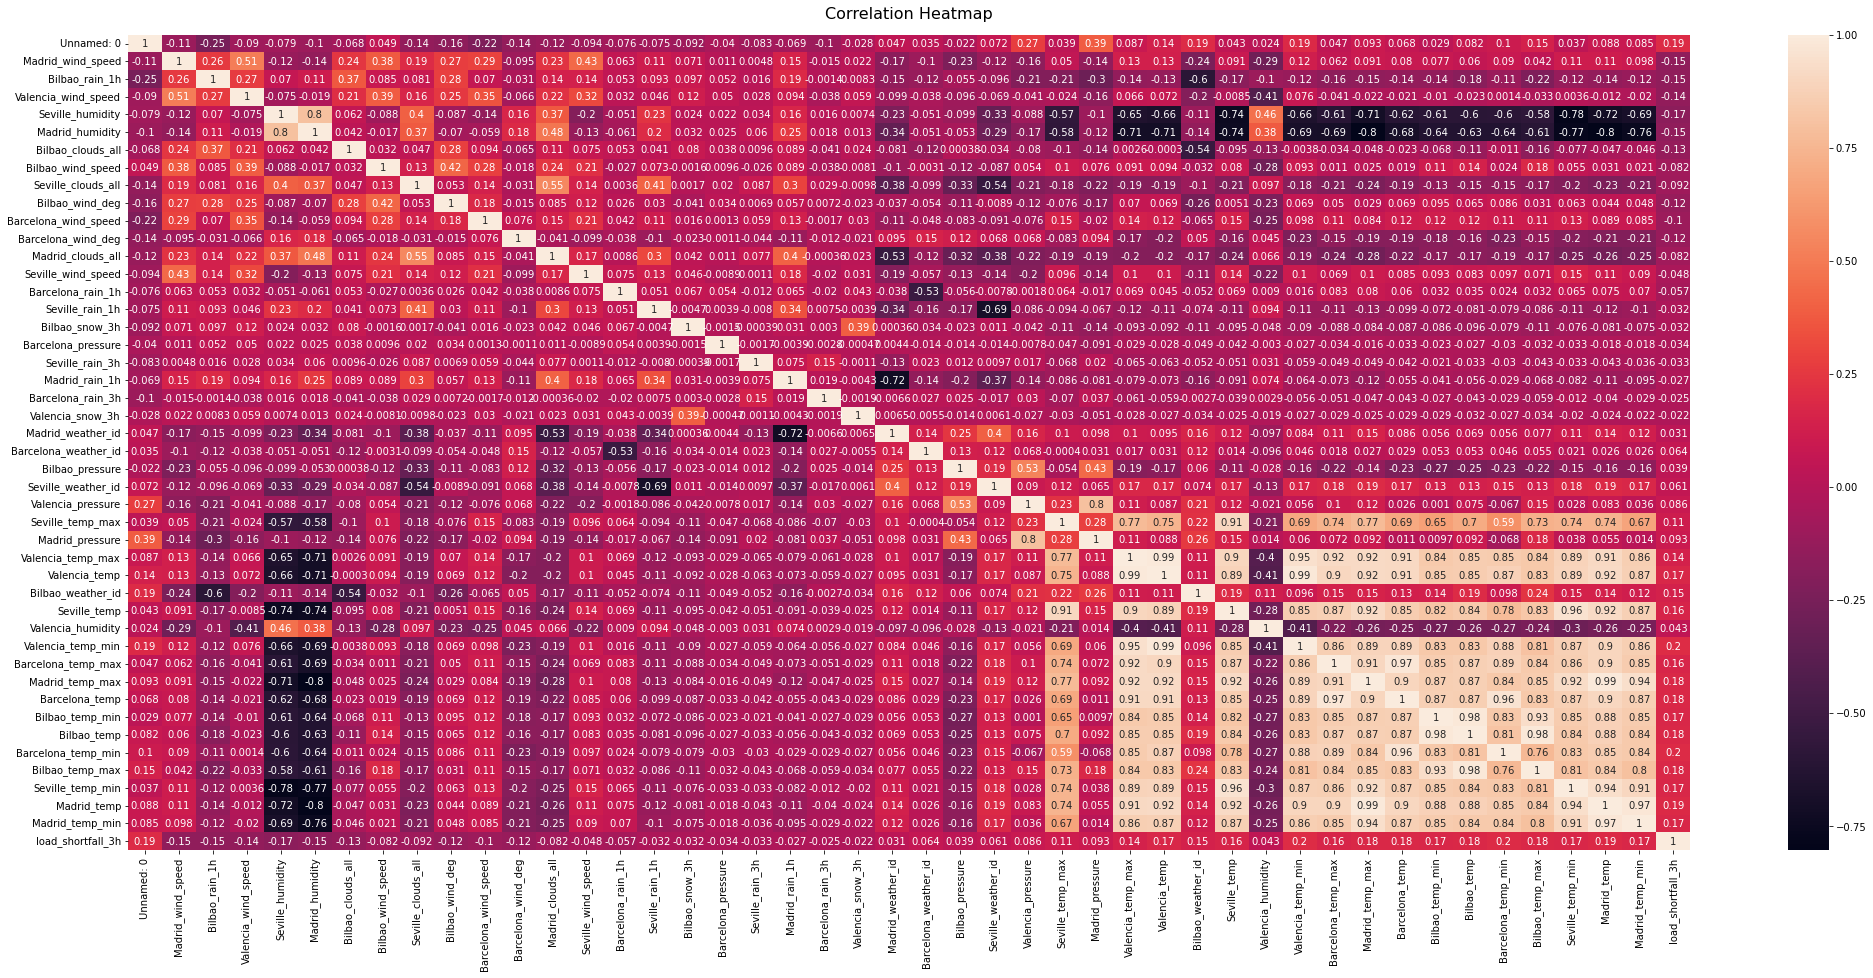

In [21]:
# Evaluate correlation

# Diplaying the correlations between features

corr_pairs = train_df.corr()

plt.figure(figsize=[35,15])
heatmap = sns.heatmap(train_df.corr(), annot=True )
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=16)

In [22]:
# Displaying the correlation values of each feature

corr_pair_unstacked = corr_pairs.unstack()
corr_pair_unstacked

Unnamed: 0         Unnamed: 0             1.000000
                   Madrid_wind_speed     -0.109288
                   Bilbao_rain_1h        -0.249633
                   Valencia_wind_speed   -0.090161
                   Seville_humidity      -0.079025
                                            ...   
load_shortfall_3h  Bilbao_temp_max        0.180934
                   Seville_temp_min       0.174718
                   Madrid_temp            0.186036
                   Madrid_temp_min        0.174744
                   load_shortfall_3h      1.000000
Length: 2116, dtype: float64

There is a presence of high correlation between some features, this means that there is Multicollinearity in our data. This will cause an overfitting problem in the models

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [26]:
# remove missing values/ features
train_df['Valencia_pressure'].fillna(train_df['Valencia_pressure'].mean(), inplace = True)

In [27]:
# we shall remove the 'Unnamed:0' column since it's essentially an index
train_df = train_df.drop(['Unnamed: 0'], axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [25]:
#Sanity check
train_df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [27]:
#We have to deal with our date datatype that is currently an object


In [28]:
## Splitting our data into dependent Variable and Independent Variable
X = train_df.drop(columns = 'load_shortfall_3h')
y = train_df['load_shortfall_3h'].astype('int')


In [29]:
# create new features
# We will convert our 'Valencia_wind_deg' and 'Seville_pressure' columns into numeric values
#The first step is to strip away the string values next to the digits
train_df['Valencia_wind_deg'] = train_df['Valencia_wind_deg'].str.extract('(\d+)')
train_df['Seville_pressure'] = train_df['Seville_pressure'].str.extract('(\d+)')

In [30]:
#Sanity check
train_df.head().T

,0,1,2,3,4
time,2015-01-01 03:00:00,2015-01-01 06:00:00,2015-01-01 09:00:00,2015-01-01 12:00:00,2015-01-01 15:00:00
Madrid_wind_speed,0.666667,0.333333,1.0,1.0,1.0
Valencia_wind_deg,5,10,9,8,7
Bilbao_rain_1h,0.0,0.0,0.0,0.0,0.0
Valencia_wind_speed,0.666667,1.666667,1.0,1.0,1.0
Seville_humidity,74.333333,78.333333,71.333333,65.333333,59.0
Madrid_humidity,64.0,64.666667,64.333333,56.333333,57.0
Bilbao_clouds_all,0.0,0.0,0.0,0.0,2.0
Bilbao_wind_speed,1.0,1.0,1.0,1.0,0.333333
Seville_clouds_all,0.0,0.0,0.0,0.0,0.0


In [31]:
#Let's check the datatypes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [32]:
#Our values are now numeric only but they are still objects, to convert to numeric we'll use the 'to_numeric' pandas function
train_df['Valencia_wind_deg'] = pd.to_numeric(train_df['Valencia_wind_deg'])
train_df['Seville_pressure'] = pd.to_numeric(train_df['Seville_pressure'])

In [33]:
#Sanity check
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   int64  
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [34]:
# engineer existing features
"""
We have to convert the time type from an object to a datetime format using the 'astype' method before desampling

"""
train_df['Year']  = train_df['time'].astype('datetime64').dt.year
train_df['Month_of_year']  = train_df['time'].astype('datetime64').dt.month
train_df['Week_of_year'] = train_df['time'].astype('datetime64').dt.weekofyear
train_df['Day_of_year']  = train_df['time'].astype('datetime64').dt.dayofyear
train_df['Day_of_month']  = train_df['time'].astype('datetime64').dt.day
train_df['Day_of_week'] = train_df['time'].astype('datetime64').dt.dayofweek
train_df['Hour_of_week'] = ((train_df['time'].astype('datetime64').dt.dayofweek) * 24 + 24) - (24 - train_df['time'].astype('datetime64').dt.hour)
train_df['Hour_of_day']  = train_df['time'].astype('datetime64').dt.hour

C:\Users\samue\AppData\Local\Temp/ipykernel_21072/2839541968.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train_df['Week_of_year'] = train_df['time'].astype('datetime64').dt.weekofyear


In [35]:
train_df.head().T

,0,1,2,3,4
time,2015-01-01 03:00:00,2015-01-01 06:00:00,2015-01-01 09:00:00,2015-01-01 12:00:00,2015-01-01 15:00:00
Madrid_wind_speed,0.666667,0.333333,1.0,1.0,1.0
Valencia_wind_deg,5,10,9,8,7
Bilbao_rain_1h,0.0,0.0,0.0,0.0,0.0
Valencia_wind_speed,0.666667,1.666667,1.0,1.0,1.0
Seville_humidity,74.333333,78.333333,71.333333,65.333333,59.0
Madrid_humidity,64.0,64.666667,64.333333,56.333333,57.0
Bilbao_clouds_all,0.0,0.0,0.0,0.0,2.0
Bilbao_wind_speed,1.0,1.0,1.0,1.0,0.333333
Seville_clouds_all,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

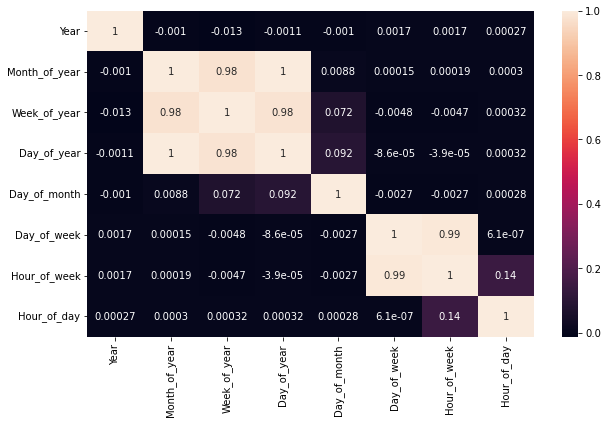

In [36]:
Time_df = train_df.iloc[:,[-8,-7,-6,-5,-4,-3,-2,-1]]
plt.figure(figsize=[10,6])
sns.heatmap(Time_df.corr(),annot=True )

In [37]:
train_df = train_df.drop(columns=['Week_of_year','Day_of_year','Hour_of_week','time'])

In [38]:
## Splitting our data into dependent Variable and Independent Variable
X = train_df.drop(columns = 'load_shortfall_3h')
y = train_df['load_shortfall_3h'].astype('int')


In [39]:
X.columns

Index(['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madri

In [40]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features', 'Score']
new_X = featureScores.sort_values('Score',ascending=False).head(40)
new_X.tail(10) #To get the least important feature based on ther score 

,Features,Score
22,Valencia_snow_3h,3110.383507
37,Madrid_temp_max,2281.817118
44,Madrid_temp,2106.588763
45,Madrid_temp_min,2054.920443
28,Seville_temp_max,1847.097423
43,Seville_temp_min,1589.866015
33,Seville_temp,1483.057026
30,Valencia_temp_max,1365.685590
36,Barcelona_temp_max,1260.724182
31,Valencia_temp,1229.799250


In [41]:
X = X[['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Bilbao_weather_id', 
        'Valencia_humidity', 'Year', 'Month_of_year', 'Day_of_month', 'Day_of_week', 'Hour_of_day']]

<AxesSubplot:>

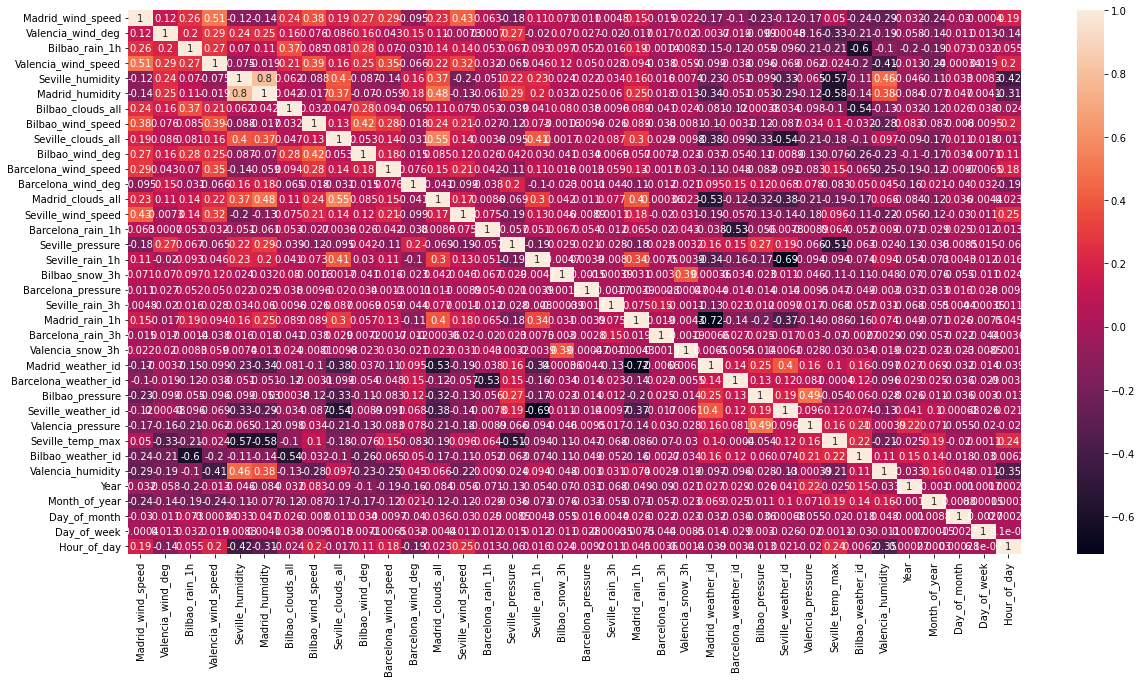

In [42]:
plt.figure(figsize=[20,10])
sns.heatmap(X.corr(),annot=True )

In [43]:
# Create standardization object
scaler = StandardScaler()

In [44]:
# Save standardized features into new variable
"""
We used a fit transform method, which first fits in the standardscaler and then transforms the data """
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Seville_weather_id,Valencia_pressure,Seville_temp_max,Bilbao_weather_id,Valencia_humidity,Year,Month_of_year,Day_of_month,Day_of_week,Hour_of_day
0,-0.950708,-0.096053,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,...,0.352274,-1.199737,-2.616796,0.649842,0.540928,-1.226179,-1.602429,-1.675368,-0.00274,-1.090901
1,-1.130863,1.641580,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,...,0.352274,-1.001379,-2.539014,0.649842,0.298645,-1.226179,-1.602429,-1.675368,-0.00274,-0.654451
2,-0.770554,1.294054,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,...,0.352274,-0.882364,-2.105564,0.649842,0.021750,-1.226179,-1.602429,-1.675368,-0.00274,-0.218001
3,-0.770554,0.946527,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,...,0.352274,-0.445978,-1.361703,0.649842,-0.583957,-1.226179,-1.602429,-1.675368,-0.00274,0.218449
4,-0.770554,0.599000,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,...,0.352274,0.268110,-1.348214,0.649842,-0.358980,-1.226179,-1.602429,-1.675368,-0.00274,0.654899


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [45]:
# create targets and features dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 42)
## Splitting our data into dependent Variable and Independent Variable
#checking the shape of the training and testing data

print('Training predictor:', X_train.shape)
print('Training target:', y_train.shape)
print('Testing predictor:', X_test.shape)
print('Testing target:', y_test.shape)

Training predictor: (7010, 36)
Training target: (7010,)
Testing predictor: (1753, 36)
Testing target: (1753,)


In [46]:
# create one or more ML models
#Instantiate the model
lm = LinearRegression()
#Fit the model into training set
lm.fit(X_train, y_train)

#predict on unseen data
predict = lm.predict(X_test)
train_predict = lm.predict(X_train) #predicting on the same training set

In [50]:
#Comparing the True value and the Predicted Value of our models
Linear = pd.DataFrame({'Actual': y_test, 'Predicted': predict})
print(Linear.head()) #Linear Model 

      Actual     Predicted
1226   11450  12364.796739
7903   13693  12245.891140
1559   18337  11993.141078
3621   -1221   9387.403075
7552    8515  14079.804444


## Predicting for Load_shortfall_3h

In [51]:
test_df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp,Madrid_temp_min,Year,Month_of_year,Week_of_year,Day_of_year,Day_of_month,Day_of_week,Hour_of_week,Hour_of_day
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,279.866667,279.150000,2018,1,1,1,1,0,0,0
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,279.193333,278.150000,2018,1,1,1,1,0,3,3
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,276.340000,276.150000,2018,1,1,1,1,0,6,6
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,275.953333,274.483333,2018,1,1,1,1,0,9,9
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,280.686667,280.150000,2018,1,1,1,1,0,12,12


In [52]:
#Engineering New Features ( i.e Desampling the Time) that will help us in our modeling
#We want our time data to be in the same format as the one in our model so it maps out well

test_df['Year']  = test_df['time'].astype('datetime64').dt.year
test_df['Month_of_year']  = test_df['time'].astype('datetime64').dt.month
test_df['Week_of_year'] = test_df['time'].astype('datetime64').dt.weekofyear
test_df['Day_of_year']  = test_df['time'].astype('datetime64').dt.dayofyear
test_df['Day_of_month']  = test_df['time'].astype('datetime64').dt.day
test_df['Day_of_week'] = test_df['time'].astype('datetime64').dt.dayofweek
test_df['Hour_of_week'] = ((test_df['time'].astype('datetime64').dt.dayofweek) * 24 + 24) - (24 - test_df['time'].astype('datetime64').dt.hour)
test_df['Hour_of_day']  = test_df['time'].astype('datetime64').dt.hour


C:\Users\samue\AppData\Local\Temp/ipykernel_21072/2362553484.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test_df['Week_of_year'] = test_df['time'].astype('datetime64').dt.weekofyear


In [53]:
time = test_df['time']

#Filling missing values in the "Valencia_pressure"
test_df['Valencia_pressure'].fillna(test_df['Valencia_pressure'].median(), inplace = True)

In [54]:
test_df = test_df[['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Bilbao_weather_id', 
        'Valencia_humidity', 'Year', 'Month_of_year', 'Day_of_month', 'Day_of_week', 'Hour_of_day']]

In [55]:
#Transforming 'Valencia_wind_deg' and 'Seville_pressure' to numeric data
test_df['Valencia_wind_deg'] = test_df['Valencia_wind_deg'].str.extract('(\d+)')
test_df['Seville_pressure'] = test_df['Seville_pressure'].str.extract('(\d+)')

test_df['Valencia_wind_deg'] = pd.to_numeric(test_df['Valencia_wind_deg'])
test_df['Seville_pressure'] = pd.to_numeric(test_df['Seville_pressure'])

In [56]:
#Sanity test
test_df.head().T

,0,1,2,3,4
Madrid_wind_speed,5.000000,4.666667,2.333333,2.666667,4.000000
Valencia_wind_deg,8.000000,8.000000,7.000000,7.000000,7.000000
Bilbao_rain_1h,0.000000,0.000000,0.000000,0.000000,0.000000
Valencia_wind_speed,5.000000,5.333333,5.000000,5.333333,8.666667
Seville_humidity,87.000000,89.000000,89.000000,93.333333,65.333333
Madrid_humidity,71.333333,78.000000,89.666667,82.666667,64.000000
Bilbao_clouds_all,20.000000,0.000000,0.000000,26.666667,26.666667
Bilbao_wind_speed,3.000000,3.666667,2.333333,5.666667,10.666667
Seville_clouds_all,0.000000,0.000000,6.666667,6.666667,0.000000
Bilbao_wind_deg,193.333333,143.333333,130.000000,196.666667,233.333333


In [57]:
time = test_df['time']

KeyError: 'time'

In [58]:
test_df = test_df[['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Bilbao_weather_id', 
        'Valencia_humidity', 'Year', 'Month_of_year', 'Day_of_month', 'Day_of_week', 'Hour_of_day']]

In [59]:
test_df.shape

(2920, 36)

In [60]:
test_df['load_shortfall_3h'] = RF.predict(test_df)

NameError: name 'RF' is not defined

In [61]:
test_df['time'] = time
load = test_df[['time','load_shortfall_3h']]
load.to_csv('Random_Forest_Sub.csv', index = False)
load

KeyError: "['load_shortfall_3h'] not in index"

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---


##  Linear Regression

In [62]:
# evaluate one or more ML models
Model_Performance = { 
    
                      'Test RMSE':
                    
                        {"Linear model": np.sqrt(metrics.mean_squared_error(y_test,predict))}
                        
                    }

# create dataframe from dictionary
Model_Performance = pd.DataFrame(data=Model_Performance)
Model_Performance

,Test RMSE
Linear model,4844.731251


In [63]:
Model_Performance2 = { 
    
                      'Test MSE':
                    
                        {"Linear model": (metrics.mean_squared_error(y_test,predict))}
}
Model_Performance2 = pd.DataFrame(data=Model_Performance2)
Model_Performance2

,Test MSE
Linear model,2.347142e+07


In [64]:
Model_Performance3= { 
    
                      'Test MAE':
                    
                        {"Linear model": (metrics.mean_absolute_error(y_test,predict))}
}
Model_Performance3 = pd.DataFrame(data=Model_Performance3)
Model_Performance3

,Test MAE
Linear model,3858.222549


## Decision Tree

### How it works:

Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that the purity of the node increases with respect to the target variable

In [65]:
# Instantiate regression tree model
Reg_tree = DecisionTreeRegressor(random_state=42)
# Fitting the model
Reg_tree.fit(X_train,y_train)
Tree_pred = Reg_tree.predict(X_test)

## Random Forest

### How it works:

Random forest is a type of supervised learning algorithm that uses ensemble methods (bagging) to solve both regression and classification problems. The algorithm operates by constructing a multitude of decision trees at training time and outputting the mean/mode of prediction of the individual trees.

In [66]:
# Our forest consists of 200 trees with a max depth of 8 
RF = RandomForestRegressor(n_estimators=400, max_depth=13)
# Fitting the model
RF.fit(X_train,y_train)
RF_predict = RF.predict(X_test)

# Compare Model Performance

In [67]:
# Compare model performance
#Comparing the True value and the Predicted Value of our models
Linear = pd.DataFrame({'Actual': y_test, 'Predicted': predict})
Decision_ = pd.DataFrame({'Actual': y_test, 'Predicted': Tree_pred})
Random_ = pd.DataFrame({'Actual': y_test, 'Predicted': RF_predict})

print(Linear.head()) #Linear Model
print('\n')
print(Decision_.head()) #Decision Tree Model
print('\n')
print(Random_.head()) # Random Forest Model

      Actual     Predicted
1226   11450  12364.796739
7903   13693  12245.891140
1559   18337  11993.141078
3621   -1221   9387.403075
7552    8515  14079.804444


      Actual  Predicted
1226   11450     8593.0
7903   13693     9138.0
1559   18337    18157.0
3621   -1221      934.0
7552    8515    10368.0


      Actual     Predicted
1226   11450   7866.478411
7903   13693  13312.693351
1559   18337  14861.728604
3621   -1221   2351.958103
7552    8515  10185.150190


## RMSE

In [68]:
Model_Performance = { 
    
                      'Test RMSE':
                    
                        {"Linear model": np.sqrt(metrics.mean_squared_error(y_test,predict)),
                        "Decision Tree" : np.sqrt(metrics.mean_squared_error(y_test,Tree_pred)),
                        "Random Forest" : np.sqrt(metrics.mean_squared_error(y_test,RF_predict))}
                        
                    }

# create dataframe from dictionary
Model_Performance = pd.DataFrame(data=Model_Performance)
Model_Performance

,Test RMSE
Decision Tree,3861.139955
Linear model,4844.731251
Random Forest,2856.742674


## Mean Squared Error

In [69]:
Model_Performance2 = { 
    
                      'Test MSE':
                    
                        {"Linear model": (metrics.mean_squared_error(y_test,predict)),
                        "Decision Tree" : (metrics.mean_squared_error(y_test,Tree_pred)),
                        "Random Forest" : (metrics.mean_squared_error(y_test,RF_predict))}
                        
                    }

# create dataframe from dictionary
Model_Performance2 = pd.DataFrame(data=Model_Performance2)
Model_Performance2

,Test MSE
Decision Tree,1.490840e+07
Linear model,2.347142e+07
Random Forest,8.160979e+06


In [70]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic